## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from scipy.stats import sem

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
num_of_mice = len(mouse_study_df['Mouse ID'].unique())
num_of_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_group = mouse_study_df.groupby('Mouse ID')
check_duplicate = mice_group['Timepoint'].value_counts()
duplicated_mice = check_duplicate[check_duplicate > 1]
duplicated_mice_id = duplicated_mice.index.get_level_values('Mouse ID').unique().tolist()
duplicated_mice_id

['g989']

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
filt = mouse_study_df['Mouse ID'] != duplicated_mice_id[0]
filt

0       True
1       True
2       True
3       True
4       True
        ... 
1888    True
1889    True
1890    True
1891    True
1892    True
Name: Mouse ID, Length: 1893, dtype: bool

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_study_df.loc[filt]
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
num_of_mice_cleaned = len(cleaned_df['Mouse ID'].unique())
num_of_mice_cleaned

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_group = cleaned_df.groupby('Drug Regimen')

tumor_mean = regimen_group['Tumor Volume (mm3)'].mean()
tumor_median = regimen_group['Tumor Volume (mm3)'].median()
tumor_var = regimen_group['Tumor Volume (mm3)'].var()
tumor_std = regimen_group['Tumor Volume (mm3)'].std()
tumor_sem = regimen_group['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({'Mean of Tumor Volume': tumor_mean,
                                 'Median of Tumor Volume': tumor_median,
                                 'Variance of Tumor Volume': tumor_var,
                                 'Standard Deviation of Tumor Volume': tumor_std,
                                 'SEM of Tumor Volume': tumor_sem
})

summary_stats_df

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_group['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

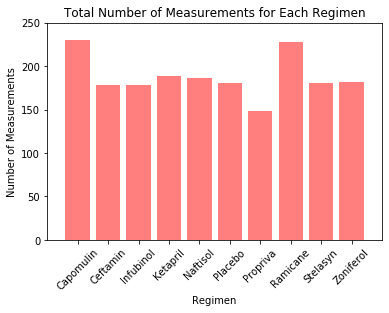

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measures = regimen_group.count().iloc[:, 0]
total_measures.plot(kind="bar", color='r', alpha=0.5, align="center", width=0.8)
plt.xticks(rotation=45)

# Other aesthetics
plt.title("Total Number of Measurements for Each Regimen")
plt.xlabel("Regimen")
plt.ylabel("Number of Measurements")
plt.xlim(-1, len(total_measures))
plt.ylim(0, max(total_measures) + 20)
plt.show()

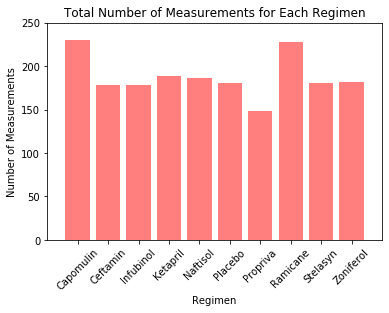

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total_measures = regimen_group.count().iloc[:, 0]
x_axis = np.arange(len(total_measures))
regimen = total_measures.index.get_level_values('Drug Regimen').tolist()
plt.bar(x_axis, total_measures, color='r', alpha=0.5, align="center", width=0.8)
plt.xticks(x_axis, regimen, rotation=45)

# Other aesthetics
plt.title("Total Number of Measurements for Each Regimen")
plt.xlabel("Regimen")
plt.ylabel("Number of Measurements")
plt.xlim(-1, len(total_measures))
plt.ylim(0, max(total_measures) + 20)
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
